### Electrostatic Parametric Instabilities:



###   

###   

In [3]:


import osiris
#import landau-helper
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpmath import *
from h5_utilities import *


## for widgets
import glob
from ipywidgets import interact_manual,fixed,Layout,interact, FloatSlider
##

import ipywidgets as widgets
interact_calc=interact_manual.options(manual_name="Make New Input and Run")
import os

plt.rc('font',size=20,family="serif")
%matplotlib inline

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 32 


def plot_tk_ldi(rundir, field, modeno=6,tlim=300):




    title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
    axis_font = {'fontname':'Arial', 'size':'34'}
    # initialize values
    PATH = os.getcwd() + '/' + rundir +'/'+ field + '.h5'
    hdf5_data = read_hdf(PATH)

#    hdf5_data = FFT_hdf5(hdf5_data)         # FFT the data (x-t -> w-k)
    k_data=np.fft.fft(hdf5_data.data,axis=1)
    hdf5_data.data=np.abs(k_data)

    nx=hdf5_data.data.shape[1]
    nt=hdf5_data.data.shape[0]
    taxis=np.linspace(0,hdf5_data.axes[1].axis_max,nt)
    deltak=2.0*3.1415926/nx


#    N = 100
#    dx = float(klim)/N
#    kvals = np.arange(0, klim+.01, dx)
#    wvals = kvals * c_s
    N=100
#    dt = float(tlim)/N
#    tvals=np.arange(0,tlim,dt)
#    kvals=np.zeros(N)
#    for i in range(0,N):
#        kvals[i]=np.sqrt(2)


    # create figure
    plt.figure(figsize=(8,6))

    SMALL_SIZE = 20
    MEDIUM_SIZE = 24
    BIGGER_SIZE = 32
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#plt.figure(figsize=(12,8))
    plt.semilogy(taxis,hdf5_data.data[:,modeno],label='PIC simulation, mode ='+repr(modeno))
#    plt.semilogy(taxis,landau_theory2,'g',label=label2)
    plt.ylabel('mode'+repr(modeno))
    plt.xlabel('Time [$1/ \omega_{p}$]')
    plt.legend()
    plt.xlim(0,tlim)



#    plt.xlabel(' α ',**axis_font)
#    plt.ylabel(' Time  [$1/ \omega_{pe}$]',**axis_font)
#    plt.xlim(0,klim)
#    plt.ylim(0,tlim)
    plt.show()

    
def langmuir_decay_deck_maker(iname='ldi-ions.txt', oname='case1.txt', amp=0.3,
             wavew = 1.03, wavemode=6,tend=300,rmass=100,rtempxi=10):


    with open(iname) as osdata:
        data = osdata.readlines()

    for i in range(len(data)):
        if 'AMP =' in data[i]:
            data[i] = ' AMP = '+str(amp)+',\n'
        if 'WAVEW' in data[i]:
            data[i] = ' WAVEW = '+str(wavew)+',\n'
        if 'WAVEMODE' in data[i]:
            data[i] = ' WAVEMODE = '+str(wavemode)+',\n'
        if 'TEND' in data[i]:
            data[i] = ' TEND = '+str(tend)+',\n'
        if 'RMASS' in data[i]:
            data[i] = ' RMASS = '+str(rmass)+',\n'
        if 'RTEMPXI' in data[i]:
            data[i] = ' RTEMPXI = '+str(rtempxi)+',\n'


    with open(oname,'w') as f:
        for line in data:
            f.write(line)
    
    print('New file '+oname+' is written.')
    dirname = oname.strip('.txt')
    print('Running OSIRIS in directory '+dirname+'...')
    osiris.run_upic_es(rundir=dirname,inputfile=oname)
    outdirname=oname.split(".")[0]
    print(outdirname)
    # e_history=energy_history(dirname=outdirname)
    # taxis=np.arange(len(e_history))*0.2
    # plt.plot(taxis,e_history)
    # plt.title('Energy Deviation vs Time (in %)')
    # plt.xlabel('Time ($\omega_p^{-1}$)')   
    # plt.show()
 #
    osiris.plot_tk_arb(outdirname,'pot',klim=0.5,tlim=tend)
    plot_tk_ldi(outdirname,'pot',modeno=wavemode,tlim=tend)
    
    print('Done')

def langmuir_decay_widget():
    style = {'description_width': '350px'}
    layout = Layout(width='55%')

    a = widgets.Text(value='ldi-ions.txt', description='Template Input File:',style=style,layout=layout)
    b = widgets.Text(value='case1.txt', description='New Output File:',style=style,layout=layout)
    c = widgets.BoundedFloatText(value=0.3, min=0.0, max=5.0, description='Driver Amplitude:',style=style,layout=layout)
    d = widgets.FloatText(value=1.032,description='Driver Frequency (in omega_pe):',style=style,layout=layout)
    e = widgets.IntSlider(value=6,min=1,max=16,step=1,description='Driver Wave Number (integer, fundamental modes of box):',
                          style=style,layout=layout)
    f = widgets.FloatText(value=300.0,description='TEND or the Total Simulation Time:',style=style,layout=layout)
    g = widgets.FloatText(value=100.0,description='RMASS Mi/me:',style=style,layout=layout)
    h = widgets.BoundedFloatText(value=10.0,min=1,max=30,description='RTEMP Te/Ti:',style=style,layout=layout)

    im = interact_calc(langmuir_decay_deck_maker, iname=a,oname=b,amp=c,wavew=d, wavemode = e, tend=f,
                      rmass=g,rtempxi=h);
    
    im.widget.manual_button.layout.width='250px'

## Langmuir Decay Instability

(This should come after Landau damping)



### Introduction

So hopefully you have seen Landau damping in a previous notebook.  From theory, Landau damping becomes noticable 
(i.e., $\gamma > 0.01 \omega_{pe}$) for wavenumbers that satisfies ($k \lambda_D > 0.3$).  Below that, electron plasma waves do not damp on their own.  

However, this does not mean that the wave energy cannot be converted to something else.  The point of the notebook is to show that electron plasma waves parametrically decay into a backward going plasma wave, and a ion acoustic wave (IAW).  This process is called Langmuir Decay Instability (LDI) in literatures.  

The notebook is organized as follows.  In the first 2 parts, we will show 2 cases where we launch a electron plasma wave for relatively small $k \lambda_D$, i.e., $k \lambda_D < 0.25$.  In this case, the plasma wave should be undamped.  This does happen in the absence of mobile ions.  However, if we have mobile ions, and $T_i << T_e$, then we can have undamped ion waves and the plasma wave can decay into a backward going plasma wave and the beat between the forward and backward going plasma waves should give rise to a low frequency beat which in term drives ion waves.








## UPIC Simulation:


###  CASE 1:  k $\lambda_D$ = 0.147

The simulation is done with the electrostatic PIC code UPIC-ES.  The simulation is periodic in 1D with 256 cells across.  There are 4 million ($2^{22}$) particles in the simulation box, which translates to roughly 16,384 particles per cell.  The initial thermal velocity is 1, which means the grid size is exactly one Debye length.


A external traveling electric field at mode 6 ($k \lambda_D = 0.147$) is applied to the system at t=0.  The frequency of the wave is obtained from the kinetic dispersion relation ($\omega/\omega_p = 1.032$).  The external electric field is left on for a duration of $3.5 \omega_{pe}^{-1}$, and then the system is allowed to evolve self-consistently.  

From your experience in the Landau damping notebook, you should expect to see no damping here.



In [6]:
dirname = 'ldi-noions'
osiris.run_upic_es(rundir=dirname,inputfile='ldi-noions.txt')

run_upic_es completed normally


####  In the cell below we look at the overall time history of the electrostatic potential, you can see the mode driven at k=.319.

/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


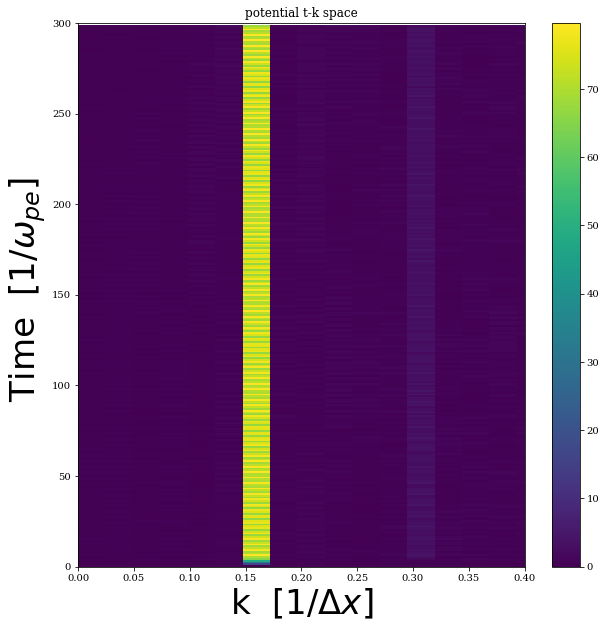

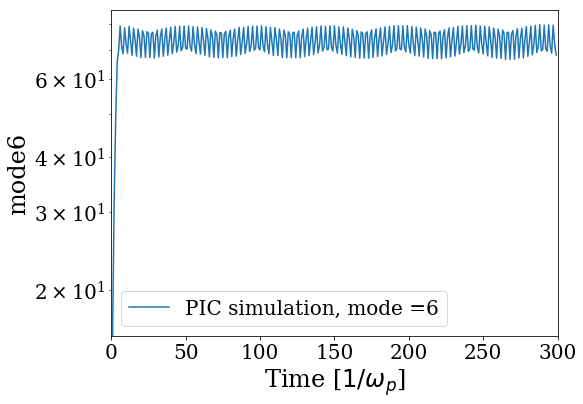

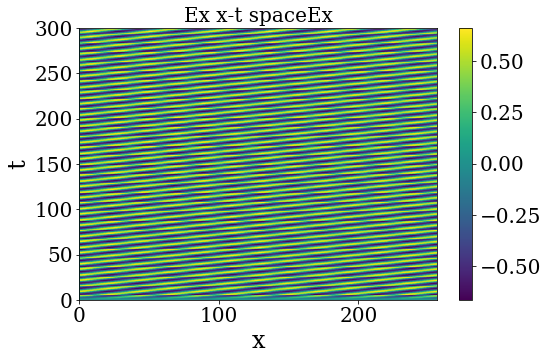

In [7]:
dirname = 'ldi-noions'

osiris.plot_tk_arb(dirname,'Ex',klim=0.4,tlim=300)
plot_tk_ldi(dirname,'Ex',modeno=6,tlim=300)
osiris.plot_xt_arb(dirname,'Ex',tlim=[0,300])

#rundir, field, title='potential', klim=5,tlim=100



###  Identical Simulation, with mobile ions.







In [18]:
dirname = 'ldi-ions'
osiris.run_upic_es(rundir=dirname,inputfile='ldi-ions.txt')

combine_h5_iaw completed normally
runbeps completed normally


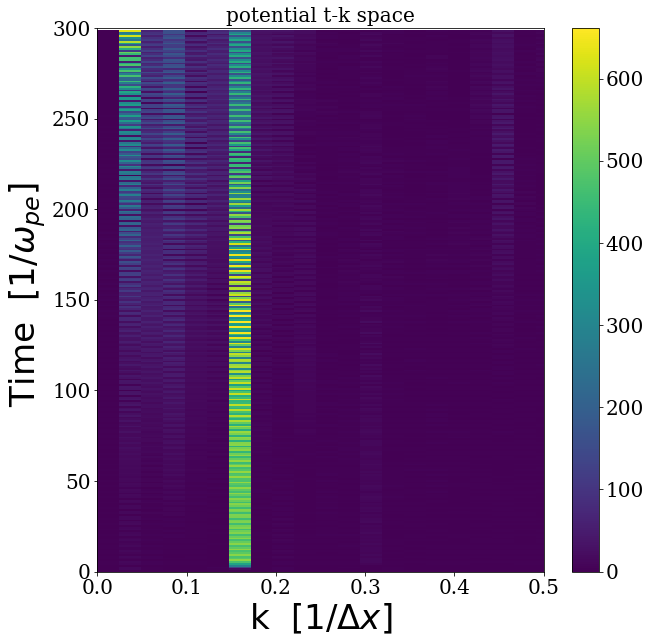

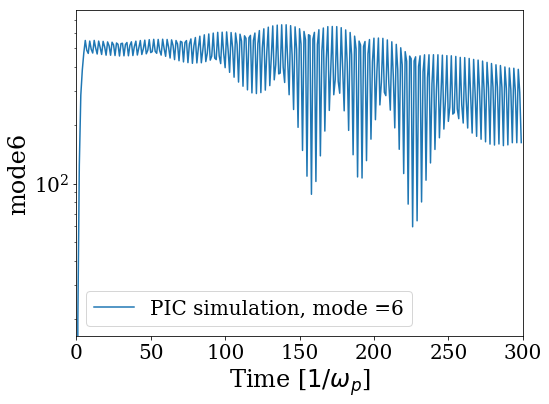

In [27]:
dirname = 'ldi-ions'


osiris.plot_tk_arb(dirname,'pot',klim=0.5,tlim=300)
plot_tk_ldi(dirname,'pot',modeno=6,tlim=300)


#rundir, field, title='potential', klim=5,tlim=100

osiris.plot_xt_arb(dirname,'pot',tlim=[0,300])
osiris.plot_xt_arb(dirname,'ions',tlim=[0,300]) 

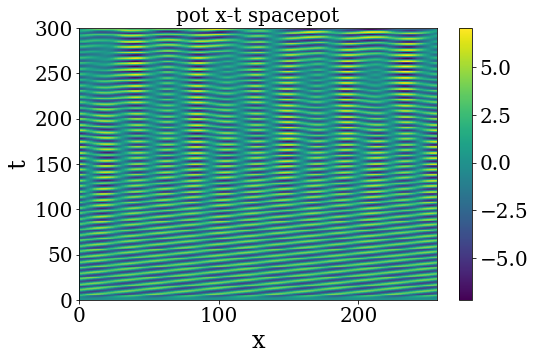

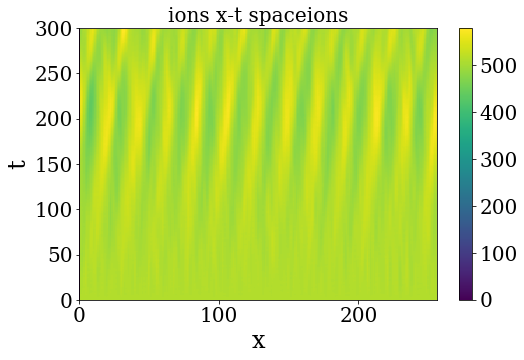

In [26]:
osiris.plot_xt_arb(dirname,'pot',tlim=[0,300])
osiris.plot_xt_arb(dirname,'ions',tlim=[0,300])

## Simulation Sandbox for Langmuir Decay Instability (LDI):

In [4]:
langmuir_decay_widget()

interactive(children=(Text(value='ldi-ions.txt', description='Template Input File:', layout=Layout(width='55%'…

In [5]:
##
##
## The spatial-temporal plots for potential and ion density are here for aesthetic reasons.  If you decide to run 
## multiple cases make sure to change the name of the folder below.
##
##


osiris.plot_xt_arb('case1','pot',tlim=[0,300])
osiris.plot_xt_arb('case1','ions',tlim=[0,300])

OSError: Unable to open file (unable to open file: name = '/home/jovyan/dev/Landau-Damping/case1/pot.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [8]:
import os
print(os.getcwd())



/home/jovyan/work/JupyterPIC/dev/Landau-Damping/case1


In [9]:
os.chdir("..")